In [1]:
setwd('/import/DB/workdir/')


In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
sce = readRDS('./after_rename.rds')

In [4]:
Idents(sce) = 'orig.ident'

In [5]:
table(sce$orig.ident)


 KO3d  KO7d  MI3d  MI7d 
 5615  9251 11199 14819 

In [6]:
scrna = subset(sce,idents = c('MI7d','KO7d'))

In [7]:
library(Matrix)

Warning message:
"package 'Matrix' was built under R version 4.2.3"


In [8]:
Idents(scrna) = 'celltype'

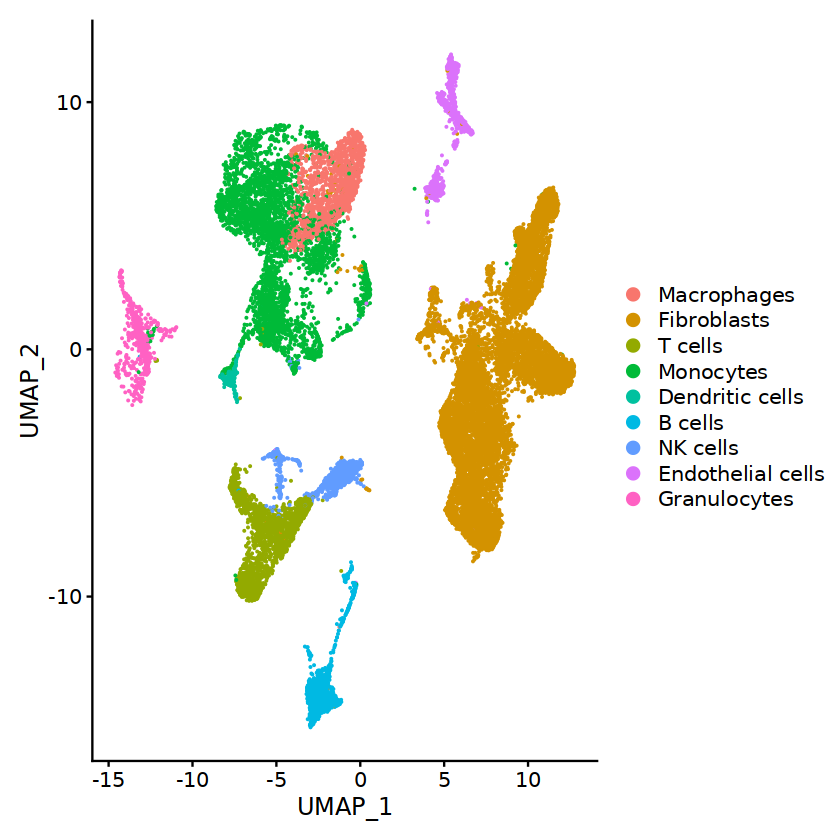

In [9]:
DimPlot(scrna)

In [10]:
scRNA = scrna

In [11]:
table(scrna$celltype)


          B cells   Dendritic cells Endothelial cells       Fibroblasts 
             1546               182              1204             11834 
     Granulocytes       Macrophages         Monocytes          NK cells 
              561              1622              3848              1218 
          T cells 
             2055 

In [12]:
Idents(scRNA) = 'celltype'
myeloid = subset(scRNA, idents= c('T cells'))

In [13]:
table(myeloid$celltype)


T cells 
   2055 

In [14]:
immune.combined = myeloid

In [15]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 10, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:10)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.3)


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2710 anchors

Filtering anchors

	Retained 2117 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2055
Number of edges: 68940

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8914
Number of communities: 8
Elapsed time: 0 seconds


In [16]:
#testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:10)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:10)
immune.combined = testAB.integrated

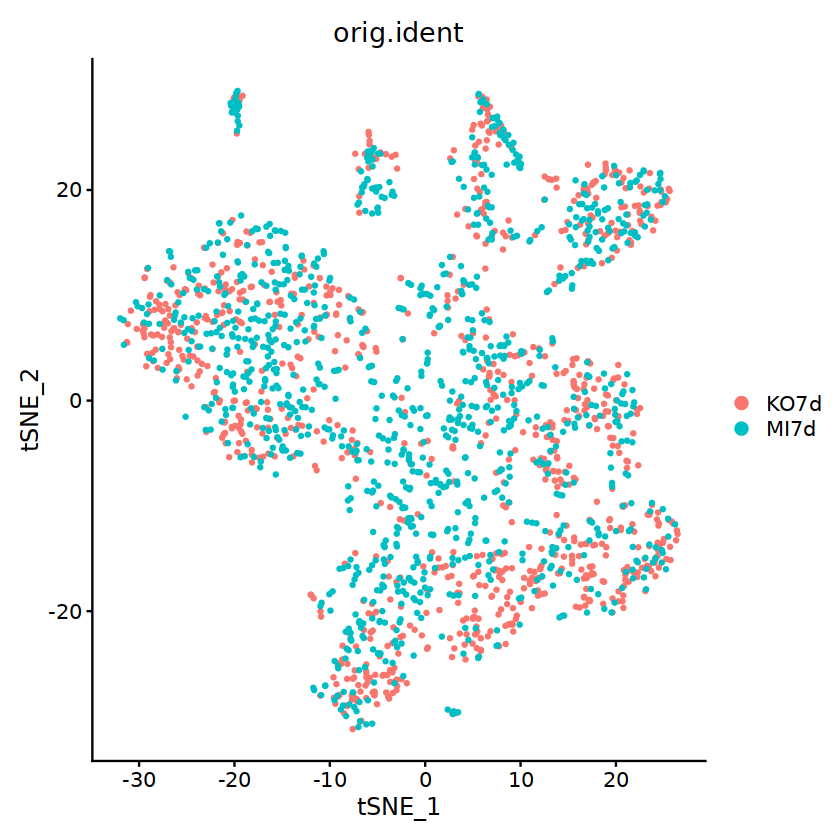

In [17]:
DimPlot(immune.combined, reduction = "tsne", group.by = "orig.ident")

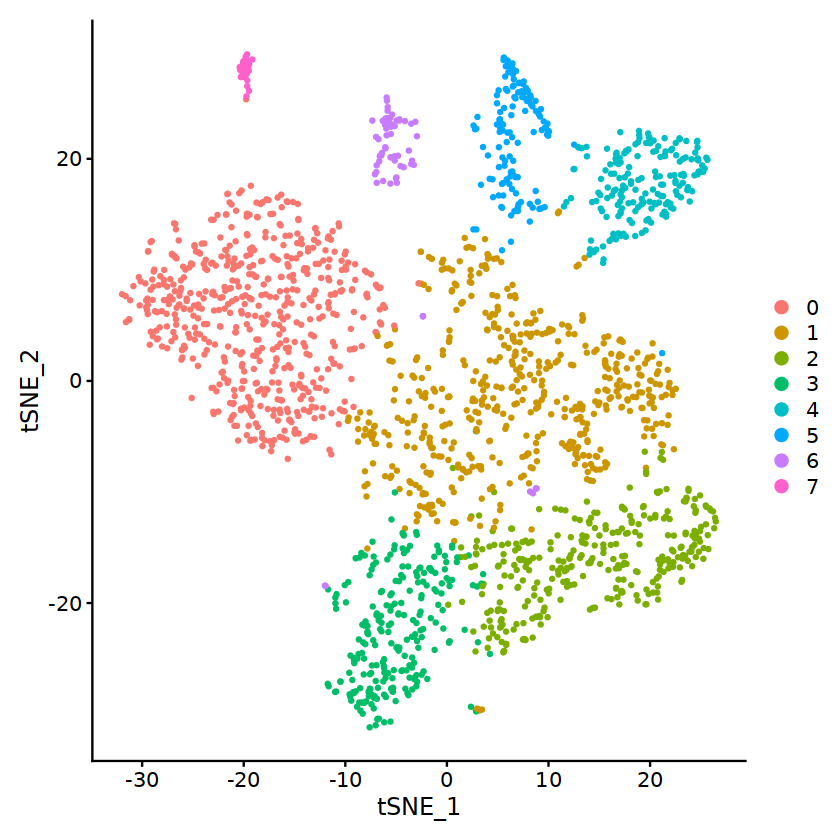

In [18]:
DimPlot(immune.combined, reduction = "tsne")

In [19]:
table(immune.combined$seurat_clusters)


  0   1   2   3   4   5   6   7 
557 527 320 240 182 135  64  30 

In [20]:
Idents(immune.combined) = 'seurat_clusters'

In [21]:
immune.combined$celltype = paste0('C',immune.combined$seurat_clusters)

In [22]:
Idents(immune.combined) = 'celltype'

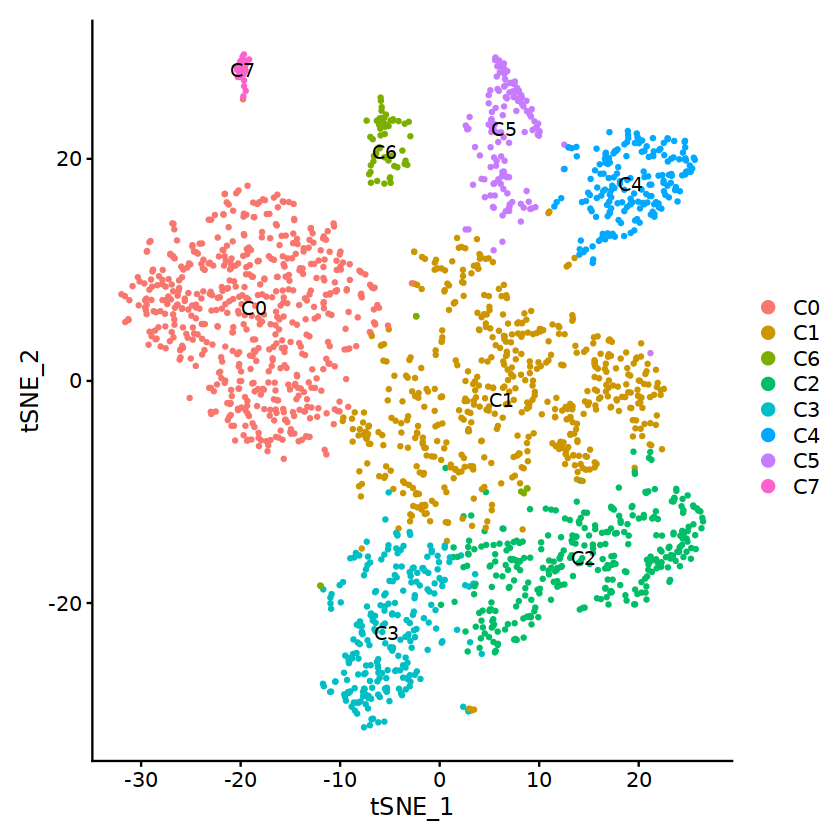

In [23]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [24]:
scRNA= immune.combined


KO7d MI7d 
 954 1101 


        C0         C1         C6         C2         C3         C4         C5 
0.27104623 0.25644769 0.03114355 0.15571776 0.11678832 0.08856448 0.06569343 
        C7 
0.01459854 

    
     KO7d MI7d
  C0  264  293
  C1  190  337
  C6   25   39
  C2  211  109
  C3  107  133
  C4   88   94
  C5   61   74
  C7    8   22

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


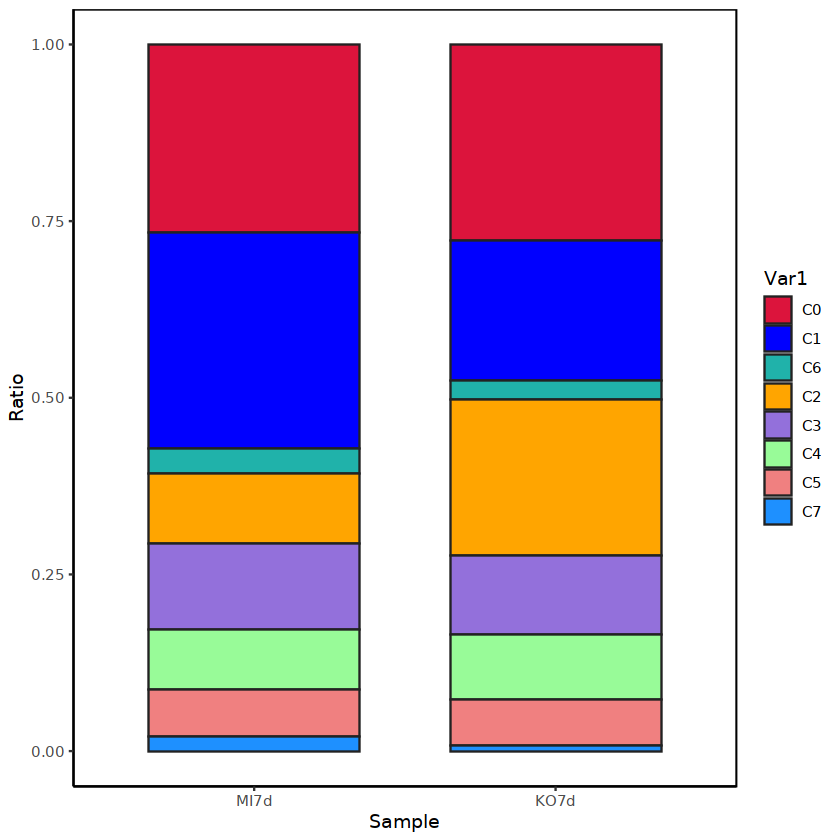

In [25]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('MI7d','KO7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

In [29]:
ggsave('./mi7d.ko7d.celltype.ratio.pdf',height = 4,width = 4)

In [32]:
getwd()

[1] "/import/DB/workdir"

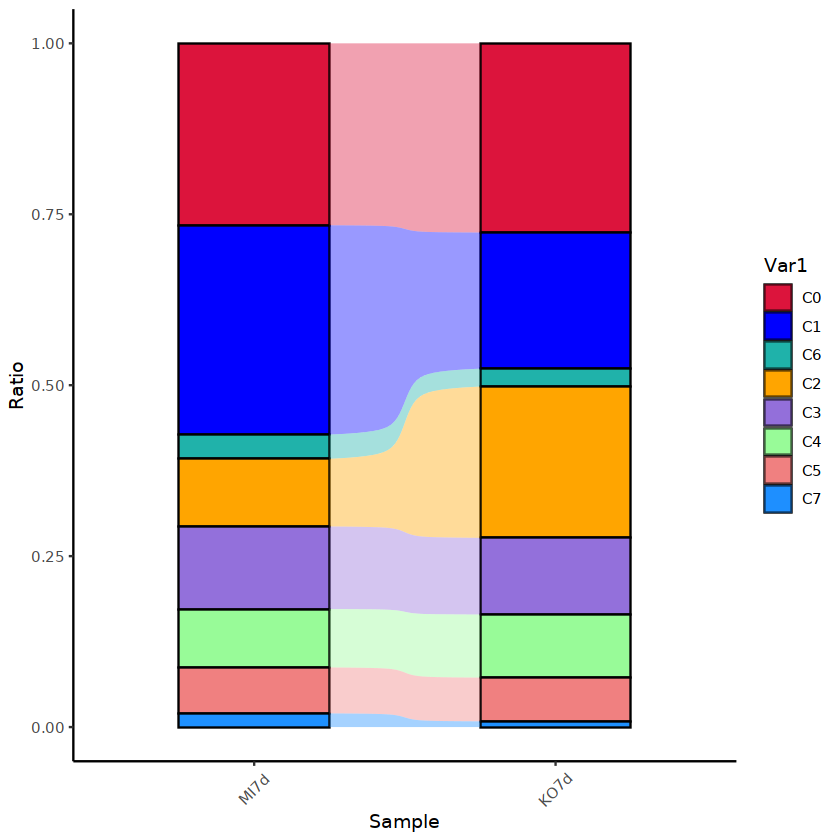

In [33]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [41]:
ggsave('figure.tcell2.pdf',height =  5,width = 4)

In [39]:
DefaultAssay(immune.combined) = 'RNA'

In [40]:
Idents(immune.combined) = 'celltype'

sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

write.csv(sce.markers,file = 'sce.markers.tcell.csv')

Calculating cluster C0

Calculating cluster C1

Calculating cluster C6

Calculating cluster C2

Calculating cluster C3

Calculating cluster C4

Calculating cluster C5

Calculating cluster C7



In [53]:
options(repr.plot.height = 12,repr.plot.width = 7)

In [54]:
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

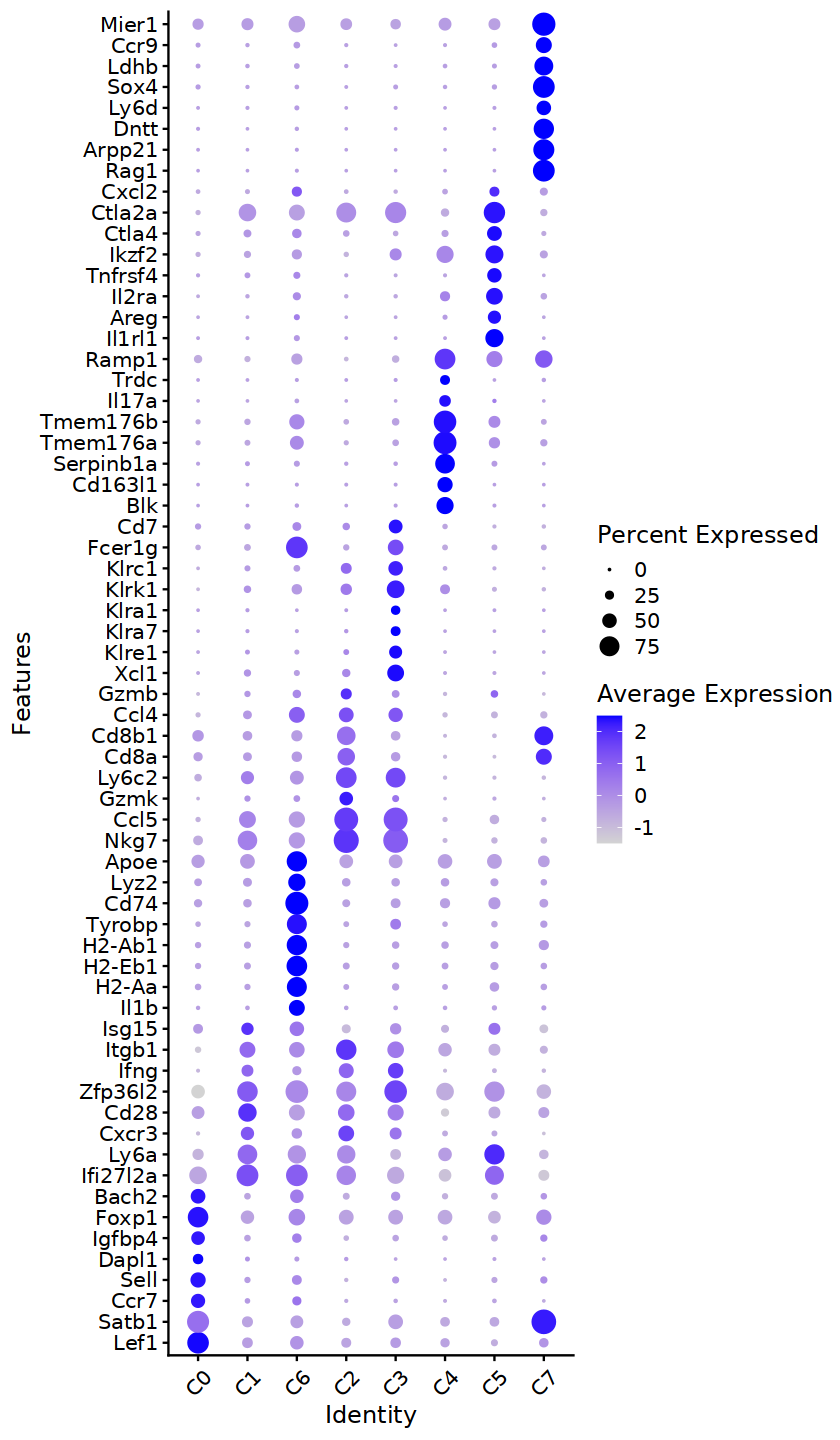

In [55]:
DotPlot(immune.combined, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [47]:
ggsave('figure.marker5.pdf',height =  7.5,width = 7)

In [44]:
getwd()

[1] "/import/DB/workdir"

In [34]:
DefaultAssay(immune.combined) = 'RNA'

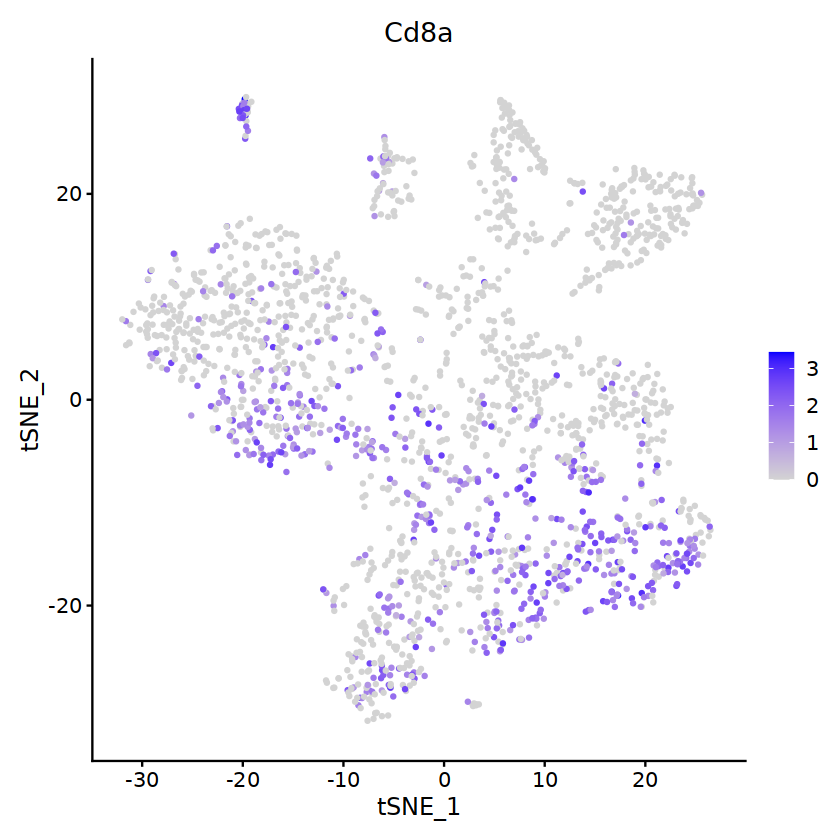

In [35]:
FeaturePlot(immune.combined,reduction = "tsne",features = c('Cd8a'))

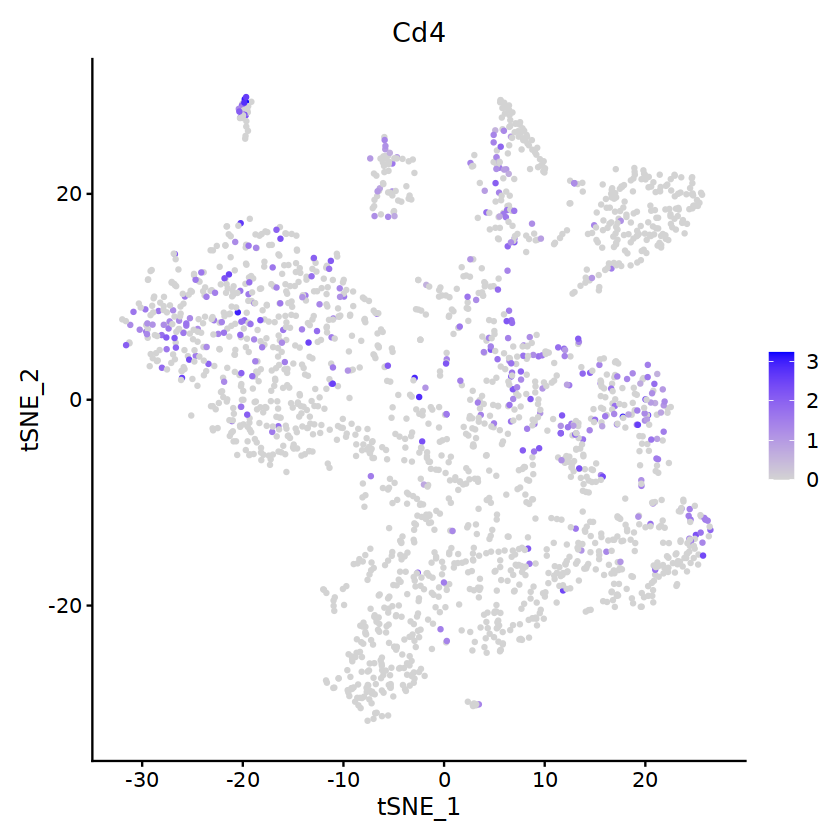

In [36]:
FeaturePlot(immune.combined,reduction = "tsne",features = c('Cd4'))

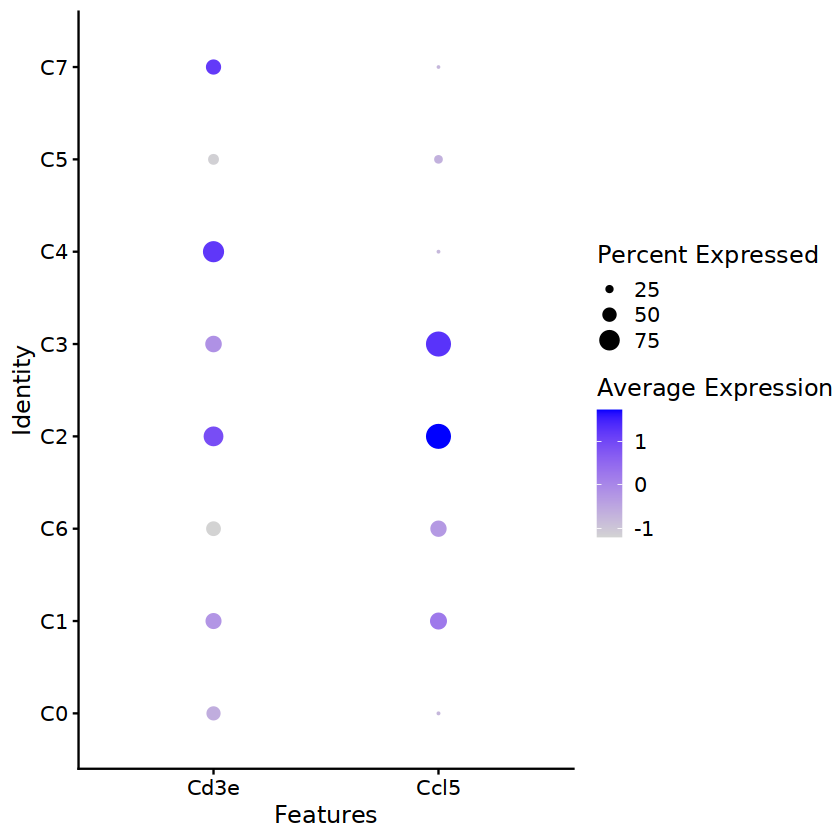

In [46]:
DotPlot(immune.combined,features = c('Cd3e','Ccl5'))

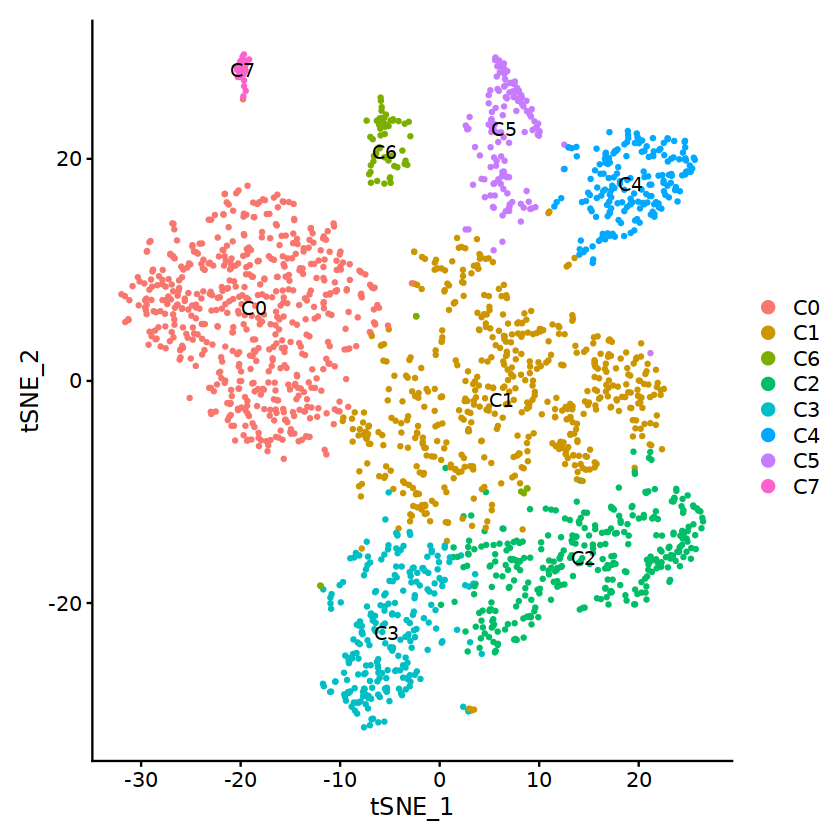

In [47]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [48]:
Idents(immune.combined)  ='celltype'

In [49]:
celltype = data.frame(
    cluster = c('C0','C1','C2','C3','C4','C5','C6','C7'),
    celltype2 = c('c0_Tn','c1','c2_cd8t','c3_nkt','c4_double_neg','c5_cd4_treg_t','c6_mhcii','c7_double_pos')
)

In [50]:
# 赋值
for(i in 1:nrow(celltype)){
  immune.combined@meta.data[which(immune.combined@meta.data$celltype == celltype$cluster[i]),'celltype2'] <- celltype$celltype2[i]}

In [51]:
Idents(immune.combined) = 'celltype2'

In [52]:
table(immune.combined$celltype2)


        c0_Tn            c1       c2_cd8t        c3_nkt c4_double_neg 
          557           527           320           240           182 
c5_cd4_treg_t      c6_mhcii c7_double_pos 
          135            64            30 

In [53]:
options(repr.plot.height = 6,repr.plot.width = 7)

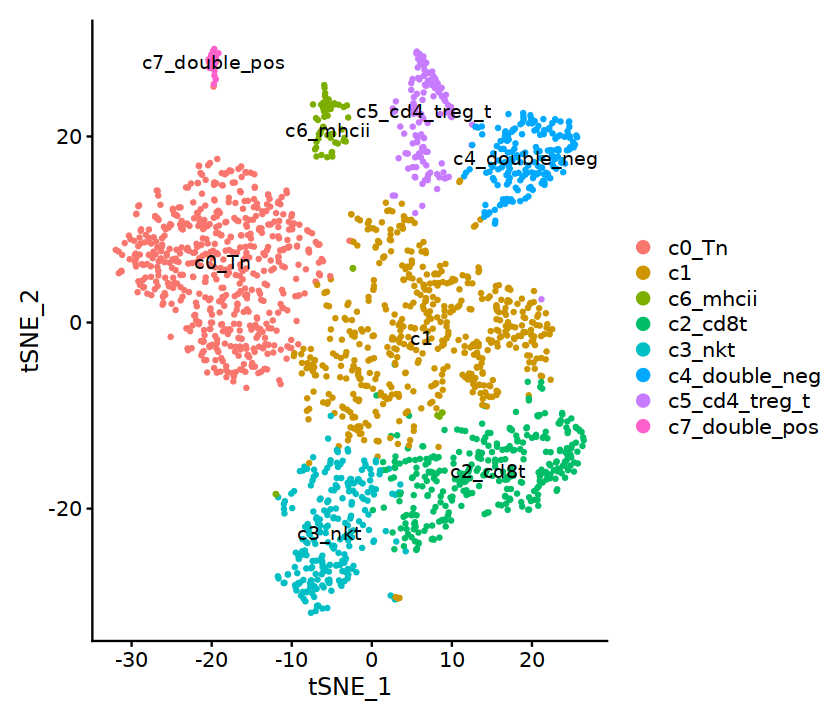

In [54]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [55]:
ggsave('figure.sub.t.pdf',height =  6,width = 7)

In [56]:
Idents(immune.combined) = 'celltype2'

sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 


Calculating cluster c0_Tn

Calculating cluster c1

Calculating cluster c6_mhcii

Calculating cluster c2_cd8t

Calculating cluster c3_nkt

Calculating cluster c4_double_neg

Calculating cluster c5_cd4_treg_t

Calculating cluster c7_double_pos



In [72]:
gene  =unique(top5$gene)

In [73]:
gene[16] = 'Cd8a'

In [74]:
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

In [79]:
options(repr.plot.height = 8,repr.plot.width = 7)

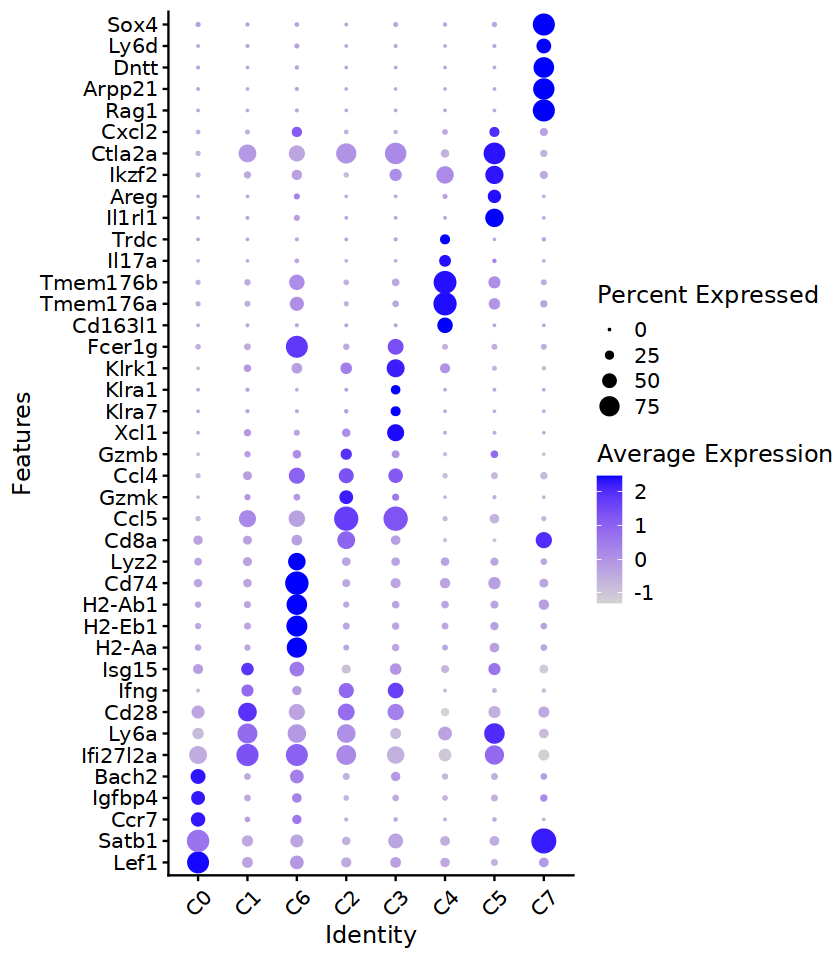

In [80]:
DotPlot(immune.combined, features = gene ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [81]:
ggsave('figure.marker.pdf',height =  8,width = 7)

In [82]:
getwd()

[1] "/import/DB/workdir"

In [ ]:
t细胞的亚群各自的特征
c0_tn 幼稚细胞 表达初始t细胞的marker
c1 暂时没有看到特征
c5_mhcii  高表达MHCII类相关基因
c2_cd8t  cd8阳性
c3_nkt cd3d+ klra1+ nkt细胞
c4_double_neg cd8a- cd4- 但是表达 il17a Trdc  类似于那篇文献的T6簇
c5_cd4_treg  cd4 treg性体细胞
c7_double_pos cd4 +cd8+ t细胞

### 

In [ ]:
#  c0  Tn  初始t细胞
# c6   MHC ii Cd74、H2-Aa、H2-Ab1、H2-Dma、H2-Dmb1、H2-Eb1 
# c7 cd4 cd8双阳
# c4 双阴
# c5 cd4
# c2 c3 cd8

# c1 

In [61]:
saveRDS(immune.combined,file = 'T.rds')

In [62]:
immune.combined = readRDS('./T.rds')

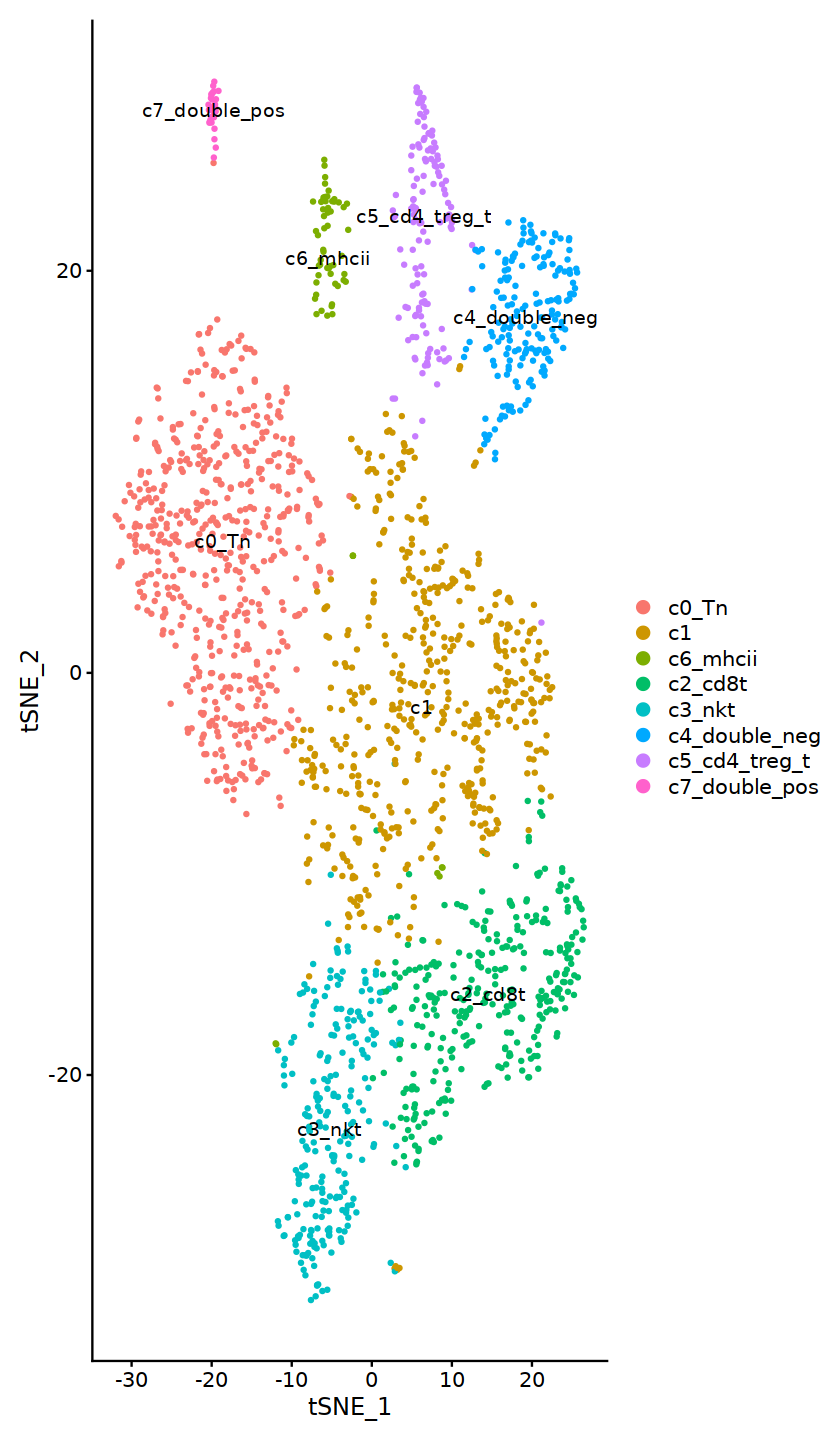

In [69]:
DimPlot(immune.combined,label = T)

In [70]:
DefaultAssay(immune.combined) = 'RNA'

In [71]:
sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster c0_Tn

Calculating cluster c1

Calculating cluster c6_mhcii

Calculating cluster c2_cd8t

Calculating cluster c3_nkt

Calculating cluster c4_double_neg

Calculating cluster c5_cd4_treg_t

Calculating cluster c7_double_pos



In [72]:
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

In [85]:
n1 = replace(unique(top5$gene),c(20,31,35),c('Cd8a','Il2ra','Foxp3'))

In [86]:
options(repr.plot.height = 8.5)

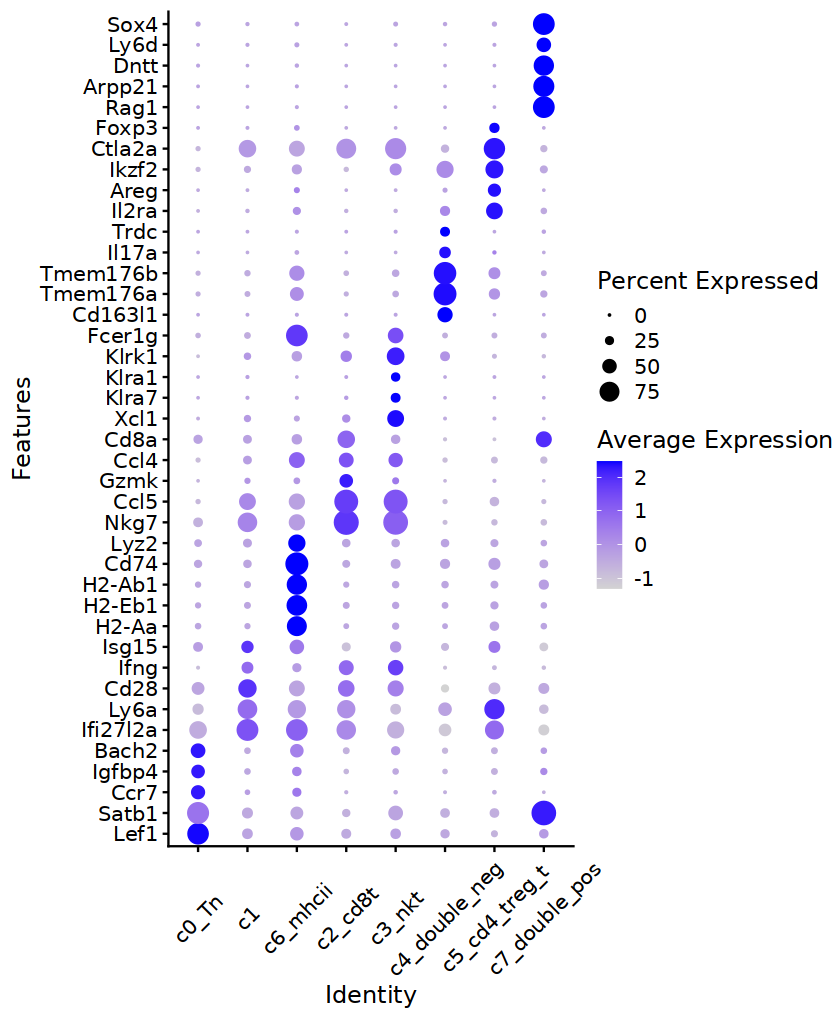

In [87]:
DotPlot(immune.combined, features =n1,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [88]:
ggsave('figure.marker.celltype.pdf',height =  9)

Saving 6.67 x 9 in image


In [30]:
getwd()


[1] "/import/DB/workdir"

In [91]:
table(immune.combined$celltype2)


        c0_Tn            c1       c2_cd8t        c3_nkt c4_double_neg 
          557           527           320           240           182 
c5_cd4_treg_t      c6_mhcii c7_double_pos 
          135            64            30 

In [92]:
scRNA = immune.combined

In [93]:
scRNA$celltype = scRNA$celltype2


KO7d MI7d 
 954 1101 


        c0_Tn            c1      c6_mhcii       c2_cd8t        c3_nkt 
   0.27104623    0.25644769    0.03114355    0.15571776    0.11678832 
c4_double_neg c5_cd4_treg_t c7_double_pos 
   0.08856448    0.06569343    0.01459854 

               
                KO7d MI7d
  c0_Tn          264  293
  c1             190  337
  c6_mhcii        25   39
  c2_cd8t        211  109
  c3_nkt         107  133
  c4_double_neg   88   94
  c5_cd4_treg_t   61   74
  c7_double_pos    8   22

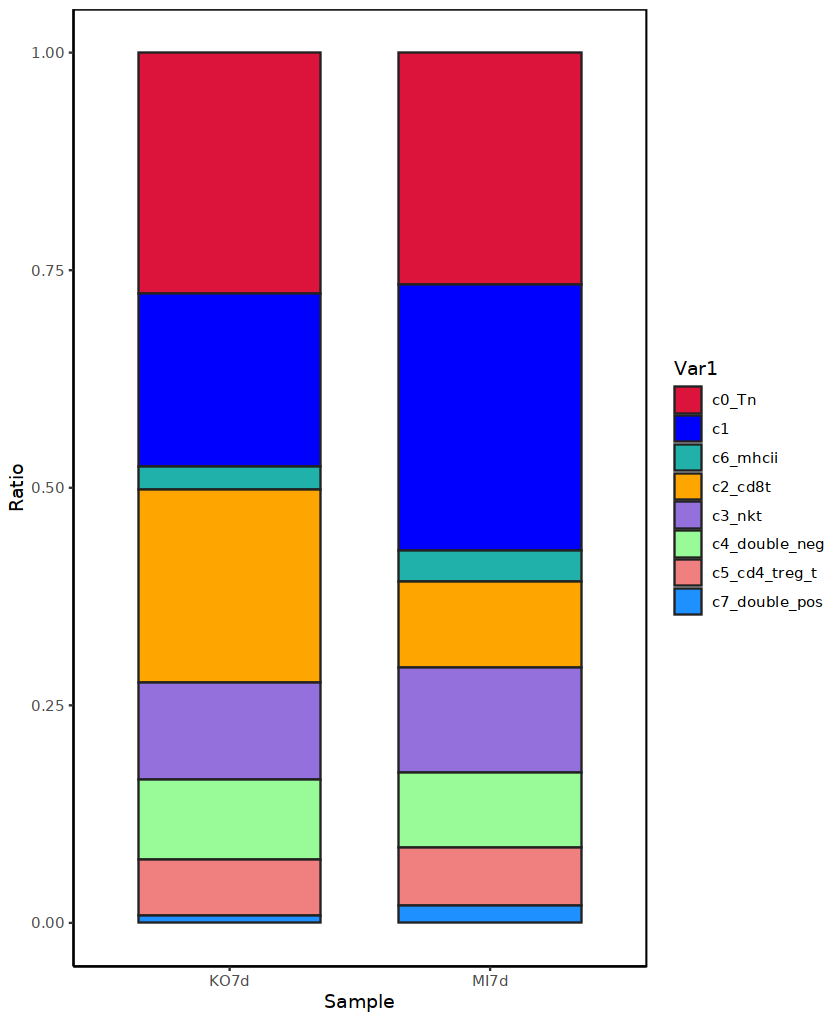

In [94]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'MI3d', 'KO7d', 'MI7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

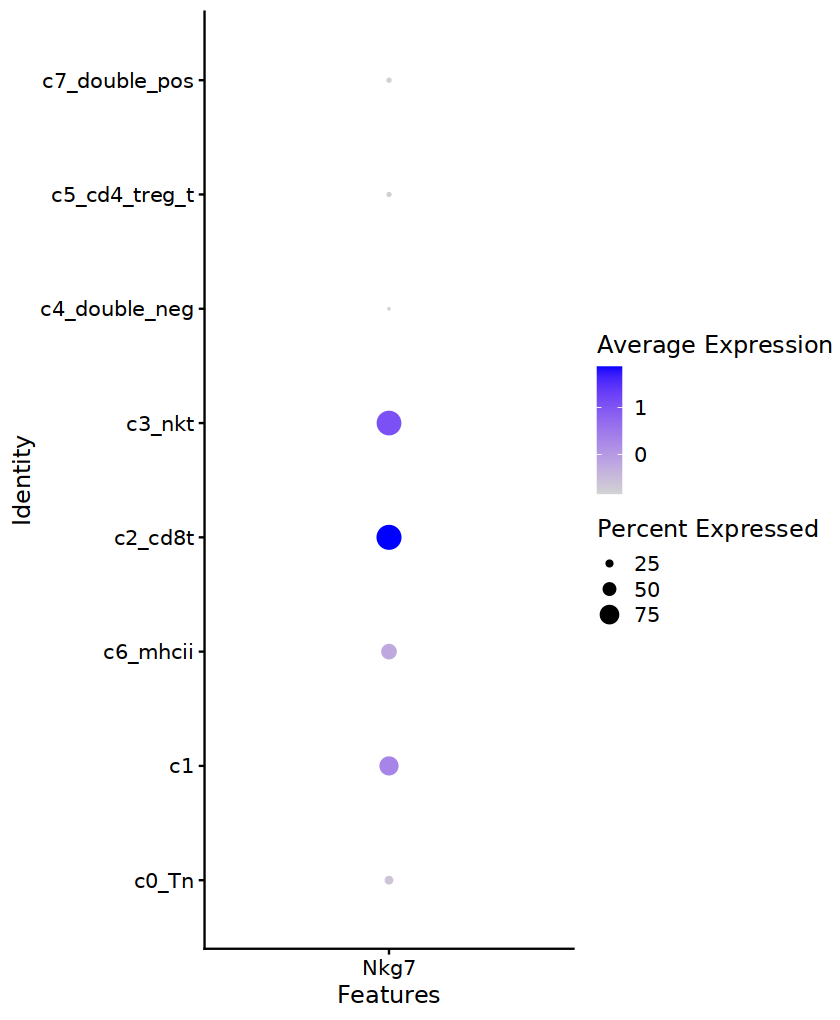

In [95]:
DotPlot(immune.combined,features = c('Nkg7'))

In [68]:
table(immune.combined$celltype2,immune.combined$orig.ident)

               
                KO7d MI7d
  c0_Tn          264  293
  c1             190  337
  c2_cd8t        211  109
  c3_nkt         107  133
  c4_double_neg   88   94
  c5_cd4_treg_t   61   74
  c6_mhcii        25   39
  c7_double_pos    8   22

In [96]:
saveRDS(scRNA,file = 'tcell.res.rds')

In [5]:
DefaultAssay(immune.combined) = 'RNA'

In [ ]:
'Cd3e','Klrd1','Klre1','Cd8a','Cd4',

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Faslg"


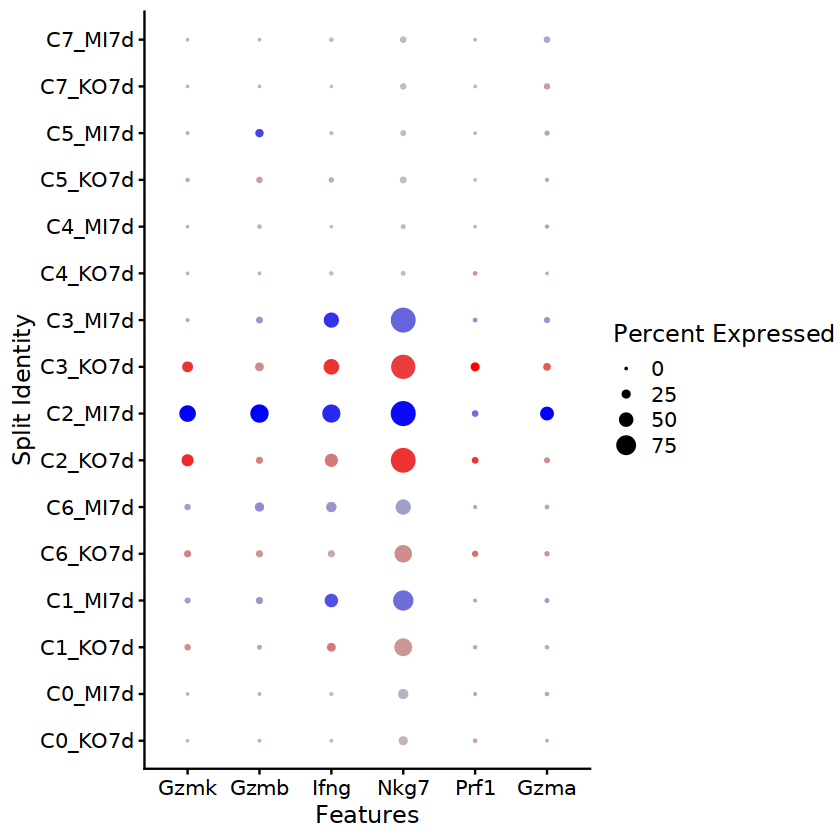

In [24]:
DefaultAssay(immune.combined) = 'RNA'

DotPlot(immune.combined,features = c('Gzmk','Gzmb','Ifng','Nkg7','Prf1','Gzma','Faslg'),split.by = 'orig.ident',cols = c('red','blue'))

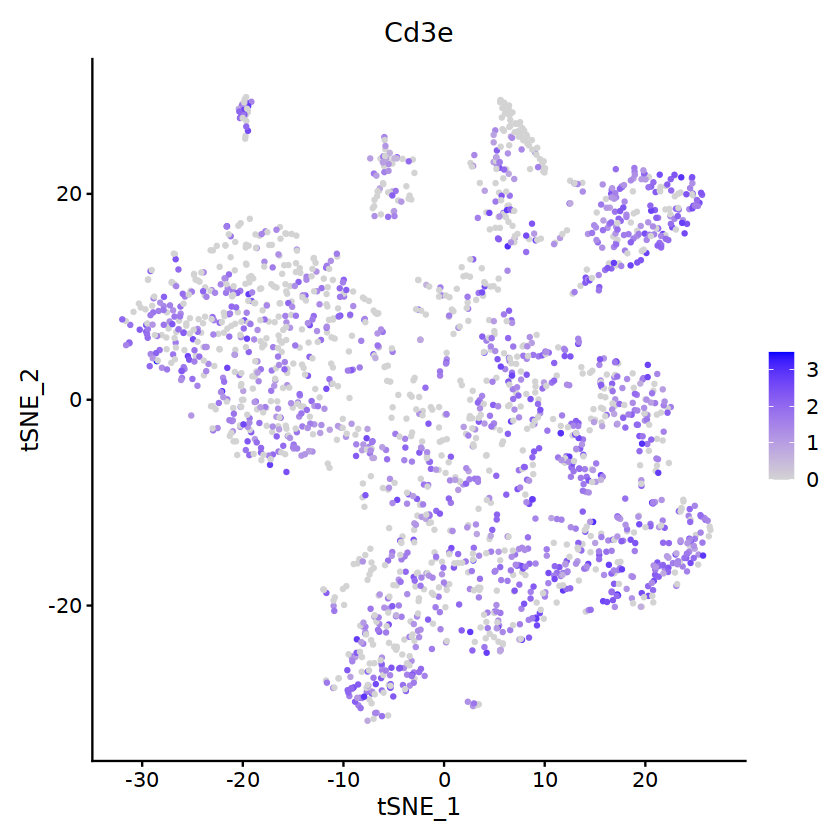

In [45]:
FeaturePlot(immune.combined,'Cd3e')

In [15]:
Idents(immune.combined) = 'celltype'

In [22]:
c2 = subset(immune.combined,idents = c('C2','C3'))

In [23]:
table(c2$orig.ident)


KO7d MI7d 
 318  242 

In [27]:
Idents(c2) = 'DF.classifications_0.25_0.02_1015'

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Faslg"
Warning message:
"Scaling data with a low number of groups may produce misleading results"


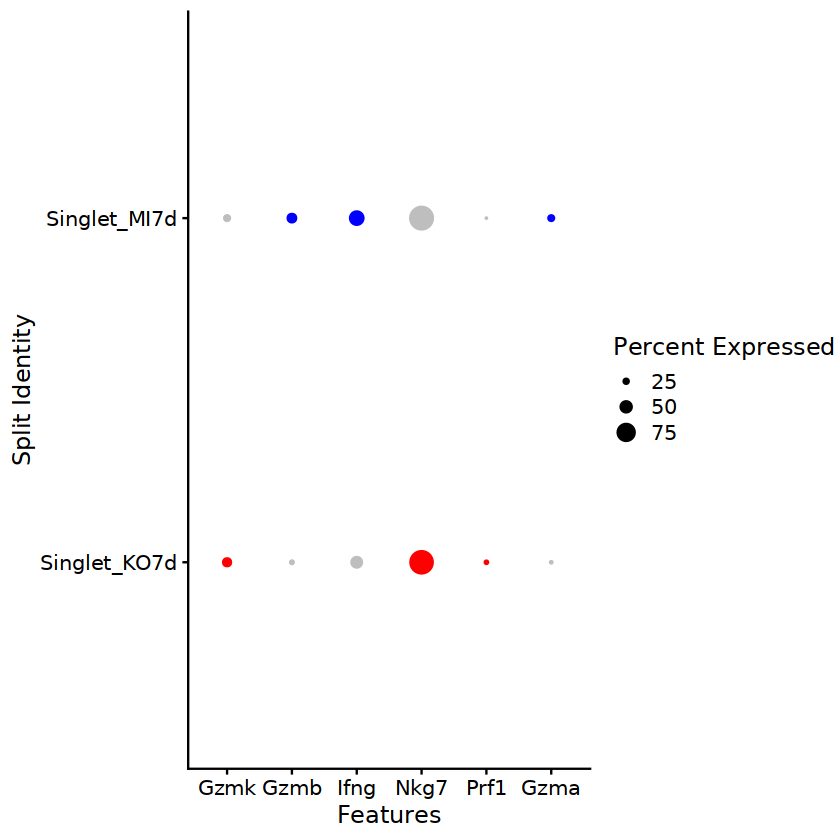

In [28]:
DefaultAssay(c2) = 'RNA'

DotPlot(c2,features = c('Gzmk','Gzmb','Ifng','Nkg7','Prf1','Gzma','Faslg'),split.by = 'orig.ident',cols = c('red','blue'))

### cd8 pd1


In [97]:
table(immune.combined$celltype2)


        c0_Tn            c1       c2_cd8t        c3_nkt c4_double_neg 
          557           527           320           240           182 
c5_cd4_treg_t      c6_mhcii c7_double_pos 
          135            64            30 

In [99]:
Idents(immune.combined) = 'celltype2'

In [100]:
cd8 = subset(immune.combined,idents = 'c2_cd8t')

In [103]:
DefaultAssay(cd8) = 'RNA'

In [108]:
cd8$pd1.group = ifelse(as.matrix(cd8@assays$RNA@data)['Pdcd1',] > 0,'Pd1+','Pd1-')

In [109]:
Idents(cd8) = 'pd1.group'

In [117]:
table(cd8$orig.ident,cd8$pd1.group)

      
       Pd1+ Pd1-
  KO7d   24  187
  MI7d   13   96

In [118]:
options(repr.plot.height = 5)

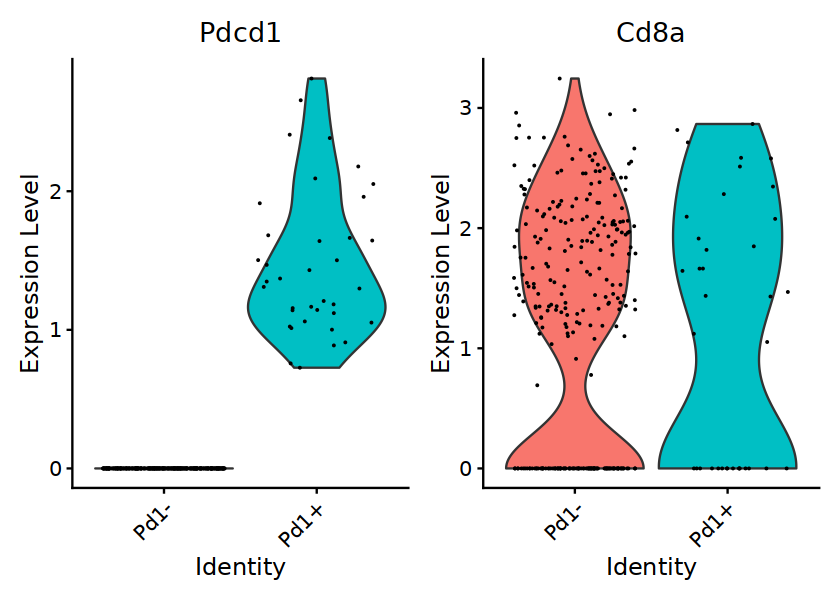

In [119]:
VlnPlot(cd8,c('Pdcd1','Cd8a'))